### K Means Clustering with Python


### Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

### TASK : Predictipn of optimum number of cluster and visual representstion for IRIS dataset.

So let's get started..

###  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing built-in IRIS dataset  and creating pandas DataFrame with imported iris dataset.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

## Checking head of a dataset..
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Let us obtain some more information about the features of this data set.

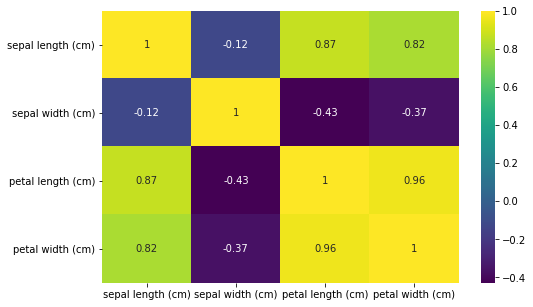

In [46]:
## Let's plot a heatmap to find coorelation between features of a dataset..

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

### Finding Optimum number of cluster.

#### How do we find the optimum number of clusters for K Means? How does one determine the value of K?
The ELBOW METHOD is one of the most popular methods to determine the optimal value of K.

In [5]:
# importing the necessary function..
from sklearn.cluster import KMeans

In [6]:
# Let's find the optimum number of clusters for k-means classification..
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

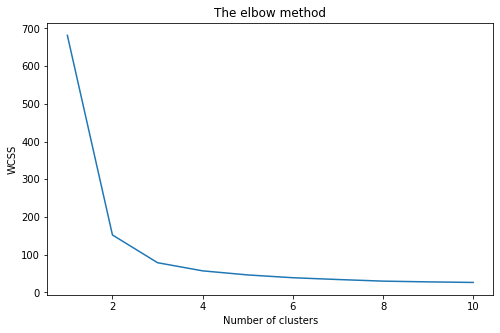

In [45]:
## Plotting the results onto a line graph 
## allowing us to observe 'The elbow'
## WCSS : Within cluster sum of squares

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we choose the optimum number of clusters as 3.

### Creating the Clusters

In [32]:
# Applying kmeans to the dataset and creating the model..

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [37]:
## Cluster centroids and lables..

print(kmeans.cluster_centers_)
print('\n')
print(kmeans.labels_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Cluster Visualization 

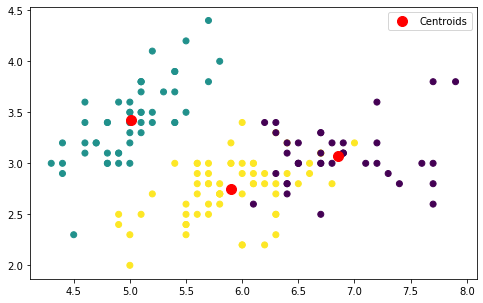

In [42]:
# visualizing the clusters based on first two columns of the dataset

plt.figure(figsize=(8,5))

plt.scatter(df['sepal length (cm)'], 
            df['sepal width (cm)'], 
            c=kmeans.labels_)

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

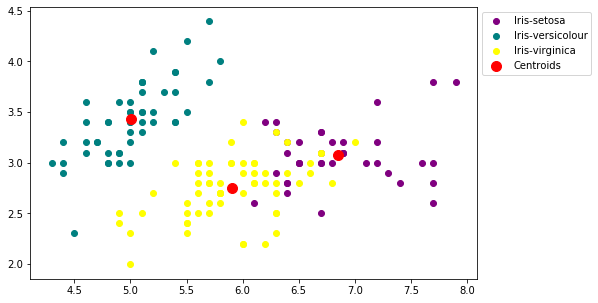

In [44]:
## Visualizig clusters based on each target classes..

plt.figure(figsize=(8,5))

plt.scatter(df[y_kmeans == 0]['sepal length (cm)'], 
            df[y_kmeans == 0]['sepal width (cm)'], 
            c = 'purple', label = 'Iris-setosa')

plt.scatter(df[y_kmeans == 1]['sepal length (cm)'], 
            df[y_kmeans == 1]['sepal width (cm)'], 
            c = 'teal', label = 'Iris-versicolour')

plt.scatter(df[y_kmeans == 2]['sepal length (cm)'], 
            df[y_kmeans == 2]['sepal width (cm)'],
         c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend(bbox_to_anchor=(1,1),loc=2)